<a href="https://colab.research.google.com/github/semla/notebooks/blob/master/fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies & import
Install Keras and Tensorflow using pip.

In [1]:
# !pip install -U keras tensorflow>=1.8.0 matplotlib numpy
!pip install -U keras tensorflow>=2.0 matplotlib numpy

ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


Import statemets

In [2]:
#from keras.preprocessing import image # for data augmentation I think
from keras.models import Sequential # For sequential models, not functional
from keras.layers import Dense, Activation,MaxPooling2D, Dropout, Conv2D, Flatten # the layers used
from keras.datasets import fashion_mnist
from keras.utils import to_categorical # one-hot encoding

import numpy as np
import tensorflow as tf # tensorflow is the backend
print( 'Tensorflow version: ' + tf.__version__) #+ "  Keras version " + print(keras.__version__) )

Using TensorFlow backend.


Tensorflow version: 1.13.1


Set variables to enable / disable features depending on where the code is run

In [3]:
use_matplotlib, use_google_drive, use_gpu = True, True, True # False, False, True #

if use_matplotlib:
  import matplotlib.pyplot as plt

# use gpu
if use_gpu:
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Using GPU at: {}'.format(device_name))

Using GPU at: /device:GPU:0


# Load data & do some preprocessing

In [4]:
# Load the dataset into training and test.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Normalization  & add a dimension for channel. Even if it is black & white images Keras wants a number for channels.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# the preprocess_input wants samples, x-values, y-values and channels
# since black & white only one channel, so add a 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# "One-hot-encode" the labels in train and test
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
# Further break training data into training and validation sets, 5000 in validation set and remaining 55,000 for training set)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Explore the data.
Take a look at the y_train which, is now one-hot-encoded.
Print the matrix of pixel values representing an image, then print the same data as an image.

Row number 2 of the labels: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Category 8 is Sneaker
The matrix of pixel values for sample 2:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.5 0.4 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.

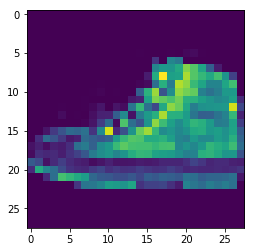

In [7]:
# Choose one of the 60000 training samples
img_index = 2
# y_train contains the lables, ranging from 0 to 9
print("Row number " + str(img_index) +" of the labels: " + str(y_train[img_index]))
label_index=np.argmax(y_train[img_index])
# Print the label, for example 2 Pullover
print ("Category "+str(label_index+1) + " is " +(fashion_mnist_labels[label_index]))

# Show one of the images from the training dataset
# reshaping neccessary to only show the columns with actual pixel data (not the one added with reshape above)
img=x_train[img_index].reshape(28,28)
np.set_printoptions(linewidth=125)
print("The matrix of pixel values for sample " + str(img_index) + ":\n" + str(np.around(img,1)))

# show the same data but as an image
if use_matplotlib:
  plt.imshow(img)

# The model
##Create the model and add layers

In [8]:
my_model = Sequential()

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu', input_shape=(28,28,1))) 
my_model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)))
my_model.add( Dropout(rate=0.3))

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
my_model.add( MaxPooling2D(pool_size=2))
my_model.add( Dropout(0.3))

my_model.add( Flatten())
my_model.add( Dense(256, activation='relu'))
#my_model.add( Dropout(0.5))
my_model.add( Dense(10, activation='softmax'))

# print the number of layers
print('Number of layers: ' + str(len(my_model.layers)))

# print sumary of the model and its layers
my_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Number of layers: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
d

##Compile the model

In [0]:
my_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             #optimizer='SGD',
             #optimizer='RMSProp',
             metrics=['accuracy'])

## Training
Save training to history

In [10]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best.hdf5', verbose = 1, save_best_only=True)
bs = 64
ep = 10

history = my_model.fit(x_train,
         y_train,
         batch_size=bs,
         epochs=ep,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 166us/step - loss: 0.4573 - acc: 0.8343 - val_loss: 0.2908 - val_acc: 0.8944

Epoch 00001: val_loss improved from inf to 0.29079, saving model to best.hdf5
Epoch 2/10
55000/55000 [==============================] - 6s 100us/step - loss: 0.3044 - acc: 0.8890 - val_loss: 0.2673 - val_acc: 0.9008

Epoch 00002: val_loss improved from 0.29079 to 0.26730, saving model to best.hdf5
Epoch 3/10
55000/55000 [==============================] - 5s 100us/step - loss: 0.2650 - acc: 0.9021 - val_loss: 0.2342 - val_acc: 0.9118

Epoch 00003: val_loss improved from 0.26730 to 0.23417, saving model to best.hdf5
Epoch 4/10
55000/55000 [==============================] - 5s 99us/step - loss: 0.2412 - acc: 0.9103 - val_loss: 0.2360 - val_acc: 0.9118

Epoch 00004: val_loss did not improve from 0.23417
Epoch 5/10
55000/55000 [==============================]

## Plot feature map

mount google drive

In [11]:
if use_google_drive:
  from google.colab import drive
  drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Plot success

Function to save image to google drive

In [0]:
import datetime
def save_png(name,ep,bs):
  date = datetime.datetime.now()
  date = date.strftime("%y%m%d%H%M%S")
  print(date)
  filename = name + '-' + date
  if ep != 0:
    filename += '-'+str(ep)+'epochs-'+str(bs)+'batch-size.png'
  
  plt.savefig('/content/gdrive/My Drive/'+filename, bbox_inches='tight')  
  print('file probably saved to: ' + filename)
 # with open('/content/gdrive/My Drive/'+filename , 'w') as f:
 #   f.write('content')

190601060427
file probably saved to: acc-190601060427-10epochs-64batch-size.png


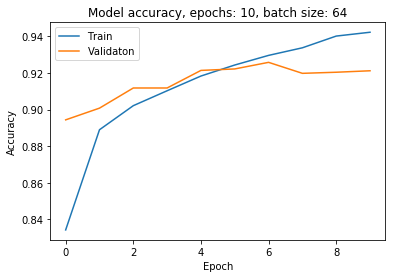

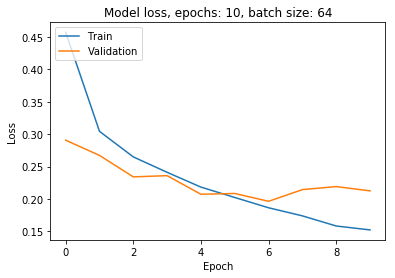

In [13]:
# print(type(history.history))
# print(len(history.history))
# print(len(history.history['loss']))
# print(history.history)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy, epochs: ' + str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.axis([0, len(history.history['loss']),0,1])
plt.legend(['Train', 'Validaton'], loc='upper left')
save_png('acc',ep,bs)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss, epochs: '+ str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.axis([0, len(history.history['loss']),0,1])
plt.axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Visualize a feature map / activation**

In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in my_model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=my_model.input, outputs=layer_outputs)

Dimensions in the first activation layer: 64
190601060428
file probably saved to: feature-map-190601060428


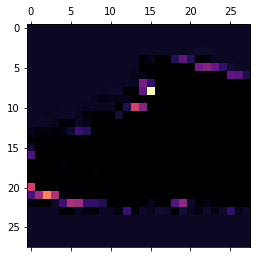

In [15]:
img_tensor = x_train[img_index]
# reshape from 3d to 4d
img_tensor = img_tensor.reshape(1,28,28,1)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print("Dimensions in the first activation layer: " + str(first_layer_activation.shape[3]))

if use_matplotlib:
  plt.matshow(first_layer_activation[0, :, :, 33], cmap='magma')
  save_png('feature-map',0,0)
  plt.show()

##Evaluate the model
Load the model with the optimal number of epochs. Predict and evaluate on the test-set.

In [16]:
my_model.load_weights('best.hdf5')

predictions = my_model.predict(x_test)
for prediction in predictions[:3]:
  print(prediction)
  

score = my_model.evaluate(x_test, y_test, verbose=1)
print(my_model.metrics_names)
print(score)
# Show test accuracy
print('Loss: ', score[0],', Accuracy:', score[1])

[4.6097497e-08 1.9634514e-08 1.1863065e-09 1.1158708e-07 1.4092194e-10 8.1628577e-06 1.8058172e-08 9.0378002e-05
 9.7342001e-10 9.9990129e-01]
[8.6439162e-05 6.6998833e-09 9.9955648e-01 9.6410349e-07 2.7542039e-05 2.6115582e-10 3.2865774e-04 1.2749253e-09
 2.9682178e-08 5.8719402e-10]
[2.4681248e-09 9.9999988e-01 4.7854171e-10 8.5668603e-08 2.5175484e-09 2.5601156e-14 3.7037939e-09 1.2568721e-15
 1.2045214e-12 6.9711252e-14]
10000/10000 [==============================] - 1s 60us/step
['loss', 'acc']
[0.22027545638084411, 0.922]
Loss:  0.22027545638084411 , Accuracy: 0.922
